Trying to use the GR4J model. Original model python code is in https://github.com/amacd31/gr4j.git. But I'm clonning the project to try and implement parameter otimization latter on.

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
# GR4J lives in a directory above this code. Not sure this is the best practice...
import os, sys
sys.path.append(os.path.relpath("../gr4j"))
from gr4j import gr4j

params = { 'X1': 303.627616, 'X2': 0.32238919, 'X3': 6.49759466, 'X4': 0.294803885 }
states = { 'production_store': 0.60 * params['X1'], 'routing_store': 0.70 * params['X3'] }
rainfall = [ 14.1, 3.7, 7.1, 9.3 ]
potential_evap = [ 0.46, 0.46, 0.47, 0.47 ]

simulated_flow = gr4j(rainfall, potential_evap, params, states)

simulated_flow

[3.979068644631248, 2.4080901028179955, 3.3106761556587947, 4.507159366671264]

Apparently things are running. Trying to re-implement the unit test just to see if I get the same results

In [75]:
# loading data and running the model
test_data = pd.read_csv('../gr4j/tests/USGS_02430680_combined.csv', skiprows=1)
sims = pd.read_csv('../gr4j/tests/sims.csv', header=None, skiprows=1)

# original test uses .ix for slicing the data. Got deprecation warning in Python 3, asking to use .loc or .iloc instead
p = test_data['P'].loc[:729]
pet = test_data['PE'].loc[:729]
qobs = test_data['Q'].loc[:729]
qsim_test = sims.loc[:,0]

params = {'X1': 303.627616,
          'X2': 0.32238919,
          'X3': 6.49759466,
          'X4': 0.294803885
         }

states = {'production_store': 0.60 * params['X1'],
          'routing_store': 0.70 * params['X3']
         }

qsim = gr4j(p, pet, params, states)

Plotting results generated now (`qsim`) and the one from the test directory (`qsim_test`). Things look good!

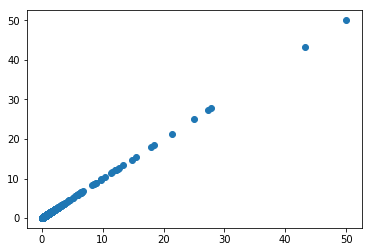

In [76]:
plt.scatter(qsim, qsim_test)
plt.show()

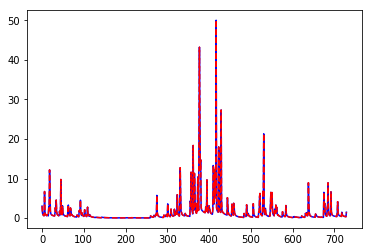

In [77]:
plt.plot(qsim_test, 'b')
plt.plot(qsim, 'r--')
plt.show()

Simulated results is the same as the ones that came with the package test data. Hurray. It works!